In [7]:
# magic! (don't worry about this)
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [8]:
#We load our gene expression datasets for the Nervous, Blood, Muscoloskeletal, and Gastrointestinal Systems
#Since we have already performed this data loading step in the previous tutorial, we have abstracted it away into
#a helper function to produce cleaner code 
import sys
sys.path.append('../helpers')
from helpers import * 

In [9]:
import pandas as pd 

#In this tutorial, we will identify genes that are differentially expressed between the
#Blood and Gastrointestinal systems. 
systems_subset=["Blood","Gastrointestinal"]
data,batches=load_rnaseq_data(systems_subset=systems_subset)

In [10]:
data.head()

,ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley,ENCSR000AEF.GM12878_Lymphoblastoid_Cells.UConn_Graveley,ENCSR446RKD.Fetal_Intestine_Small.UW_Glass,ENCSR396GIH.Sigmoid_Colon.Stanford_Snyder,ENCSR000CUA.Primary_hematopoietic_stem_cells.CSHL_Gingeras,ENCSR951NPS.Fetal_Stomach.UW_Glass,ENCSR463JBR.Primary_T_CD4._cells_from_peripheral_blood.FHCRC_Heimfeld,ENCSR825GWD.Sigmoid_Colon.Stanford_Snyder,ENCSR482VRI.Fetal_Intestine_Small.UW_Glass,ENCSR357XTU.Primary_Natural_Killer_cells_from_peripheral_blood.FHCRC_Heimfeld,...,ENCSR000CUC.Monocytes.CD14._RO01746_Primary_Cells.CSHL_Gingeras,ENCSR774SEX.Fetal_Stomach.UW_Glass,ENCSR000CWL.GM12892_Lymphoblastoid_Cells.Caltech_Wold,ENCSRMAR045.Primary_T_cells_effector_memory_enriched_from_peripheral_blood.Broad_Bernstein,ENCSR449GLL.Primary_B_cells_from_peripheral_blood.FHCRC_Heimfeld,ENCSR721HDG.Gastric.Stanford_Snyder,ENCSR000CUC.Primary_monocytes_from_peripheral_blood.CSHL_Gingeras,ENCSR000AED.GM12878_Lymphoblastoid_Cells.CSHL_Gingeras,ENCSR314LXG.Karpas.422_B_Cell_Non.Hodgkin_Lymphoma_Cell_Line.CSHL_Gingeras,ENCSR642GSA.Primary_T_CD8._naive_cells_from_peripheral_blood.UCSF_Costello
ENSG00000242268.2,0.384825,0.805894,0.147409,0.292986,0.312230,0.365661,0.320575,0.335840,-0.166682,0.555738,...,0.262340,0.484857,0.237627,0.473082,0.269468,0.319248,0.250981,0.221102,0.189249,0.418133
ENSG00000167578.12,3.392432,2.345439,2.697207,3.277173,3.183208,2.310099,3.835511,2.717338,2.910742,3.575442,...,4.144740,2.644906,4.476855,3.310718,4.641770,2.900447,4.129620,3.832572,3.375140,3.721178
ENSG00000270112.2,0.145993,0.033347,0.305393,0.024166,0.153861,-0.043155,0.174681,0.146111,0.047973,-0.005789,...,0.043265,0.099238,0.039246,0.159558,0.114350,0.169264,0.049076,-0.027327,-0.031017,0.114565
ENSG00000078237.4,2.051930,2.783840,2.124639,2.829874,2.028751,2.054576,2.486704,2.510008,1.834919,3.043581,...,2.145222,2.150230,2.600939,2.531810,2.413229,2.362621,2.189180,2.660524,2.550853,2.296903
ENSG00000263642.1,-0.000008,0.004928,0.000988,0.011045,0.002950,0.474896,0.018125,-0.003307,0.015049,0.007729,...,0.000865,-0.029728,0.005598,0.005704,-0.000461,0.001182,0.000205,0.001637,0.005670,-0.001775


In [13]:
# let us import some useful things for doing math in Python 
import pylab 
import scipy 
import scipy.stats
import numpy as np 
from math import factorial 
from scipy.stats import binom


## Binomial Distribution

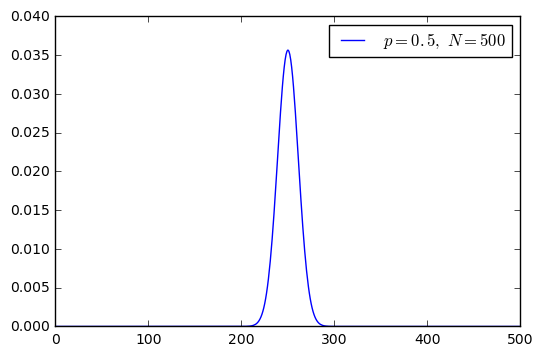

In [15]:
#plot the binomial distribution for the dataset 
p=0.5
N=500
dist=binom(N,p)
trials=np.arange(0,N+1) #we simulate N trials 
plt.plot(trials,dist.pmf(trials),label=r'$p=%.1f,\ N=%i$' % (p,N))
plt.legend()
plt.show()

The binomial formula tells you the probability of observing x "successes", given N trials and probability(success)=p  

$$ P(x;p,n)=\frac{n!}{x!(n−x)!}p^x(1-p)^{(n-x)} $$


## One Sample T-test

$$ t=\frac{\bar{x} - \mu}{S}*\sqrt(N) $$

$$ df = N - 1 $$

In [21]:
# two-sided pvalue
#tstat is the t-statistic you have calculated
#df is the degrees of freedom 
def pvalue_from_t(tstat,df):
    pval = scipy.stats.t.sf(np.abs(tstat), df)*2  
    return pval 


#TODO: 
# Next, implement the function for a one-sample T-test
# your function should return the p-value for the t-Test 

# inputs to your function are:
# samples = your list of sample values 
# mu = "population" mean 

#output of your function: the t-statistic and p-value for the one-sample T-test (2-tailed)
#Hint: use the function 'pvalue_from_t' above to get a pvalue from a t-statistic 
#and the df(instead of using our lookup table)

def t_test_one_sample(samples,mu): 
    xbar= sum(samples)/len(samples)
    std=#Your code here 
    tstat=#Your code here 
    df=#Your code here 
    pval=pvalue_from_t(tstat,df)
    return tstat,pval 


SyntaxError: invalid syntax (<ipython-input-21-67e3aec2f5fb>, line 25)

# Two-Sample T-Test (Welch's T-Test) 

$$ t = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{\frac{(s_1)^2}{N_1}+\frac{(S_2)^2}{N_2}}} $$

$$ df = \frac{(\frac{(s_1)^2}{N_1}+\frac{(s_2)^2}{N_2})^2}{\frac{(s_1)^4}{(N_1)^2v_1}+\frac{(s_2)^4}{(N_2)^2v_2}} $$

In [ ]:
#TODO: 
#implement the function for Welch's T-test (the 2-sample T-test)
#hint: use the function pvalue_from_t above to get the pvalue from a t-statistic and the df. 
#inputs: 
#samples1 -- a list of gene expression values from your first group (i.e. Blood samples)
#samples2 -- a list of gene expression values from your second group (i.e. Gastrointestinal samples)

#first, write a separate function to find degrees of freedom for Welch's t-test:
def df_welch(samples1,samples2): 
    df=#Your code here! 
    return df; 

def t_test_welch(samples1,samples2): 
    tstat=None # Your code here! 
    df=None #Youru code here! 
    pval=pvalue_from_t(tstat,df)
    return tstat,pval 

## Using Welch's T-test to determine whether a gene is expressed differently between Blood and Gastrointestinal cell types

In [36]:
#let's pick a gene of interest, for example gene 0. 
gene_id=0
sample_gene=data.iloc[gene_id,:]
blood_expression=sample_gene[np.where(batches["System"]=="Blood")[0]]
gastro_expression=sample_gene[np.where(batches["System"]=="Gastrointestinal")[0]]

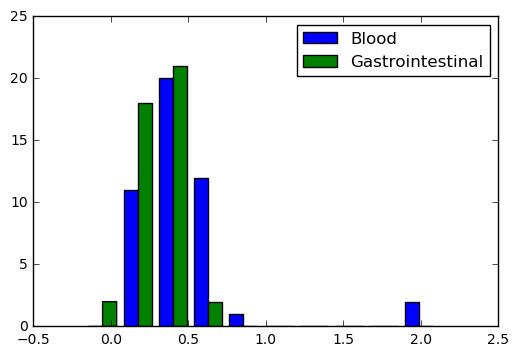

In [38]:
#plot a histogram of our data to make sure they are normally-distributed 
#(Look for a bell-shaped curve!)
plt.hist([blood_expression,gastro_expression],label=["Blood","Gastrointestinal"])
plt.legend(loc=0)
plt.show()

In [42]:
#TODO: use your implementation of the Welch's T-test to check if the gene is differentially expressed
# between the 2 samples 
import math 
delta_mean=np.mean(blood_expression)-np.mean(gastro_expression)
s1_squared=math.pow(np.std(blood_expression,ddof=1),2) 
s2_squared=math.pow(np.std(gastro_expression,ddof=1),2)
N1=len(blood_expression) 
N2=len(gastro_expression)
denominator= math.sqrt(s1_squared/N1 + s2_squared/N2) 
t=delta_mean/denominator 
print("T-statistic: "+ str(t))

T-statistic: 3.48999129945


In [45]:
#check your work: do the values you got match the values here:
result=scipy.stats.ttest_ind(blood_expression,gastro_expression,False)

In [50]:
print("P-value:"+ str(result.pvalue)) 
print("T-statistic:"+str(result.statistic))


P-value:0.00100376787216
T-statistic:3.40473230407


We will now cycle through the list of genes in our dataset to determine which ones are differentially expressed
with p-value < 0.05. We will store these genes in a dictionary 

In [63]:
differential_genes = dict() 
num_genes=data.shape[0]
print("num_genes:"+str(num_genes))
for gene_id in range(num_genes):
    sample_gene=data.iloc[gene_id,:]
    blood_expression=sample_gene[np.where(batches["System"]=="Blood")[0]]
    gastro_expression=sample_gene[np.where(batches["System"]=="Gastrointestinal")[0]]
    #compute the t-statistic and p-value 
    result=scipy.stats.ttest_ind(blood_expression,gastro_expression,False)
    p_value=result.pvalue 
    if p_value < 0.01: 
        differential_genes[gene_id]=p_value 


num_genes:55667


How many differential genes do we observe? 

In [64]:
print("differential genes:"+str(len(differential_genes.keys())))
print("num_genes:"+str(num_genes))

differential genes:21265
num_genes:55667


That's a very high number, nearly half of all genes appear to be differentially expressed between blood and gastrointestinal samples. Something seems off... Let's plot the distribution of significant p-values that we observed. 

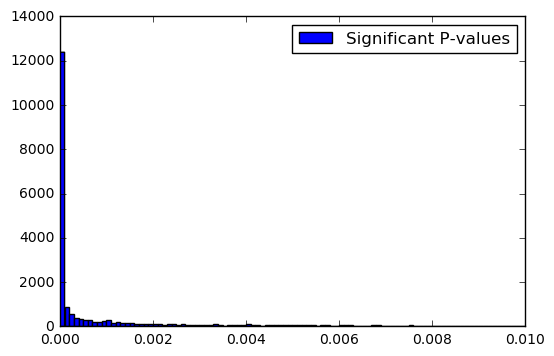

In [65]:
plt.hist([differential_genes.values()],bins=100,label=["Significant P-values"])
plt.legend(loc=0)
plt.show()

## Multiple testing correction (Bonferroni method)

The very high number of differentially expressed genes is due to performing multiple statistical tests. A p-value of 0.01 means that for every 100 tests we perform, we will observe one false positive. Since we have 55,667 genes in the dataset, we are performing 55,667 statistical tests. Using a p-value cutoff of 0.01, we expect to observe 0.01 * 55,667= 556 false positive genes. We can correct for this by multiplying observed p-values by the number of tests performed, or, equivalently, lowering the p-value threshold to 0.01/55,667. This is known as "Bonferroni correction". Let's perform Bonferroni correction on our set of differentially expressed genes. 

In [66]:
new_threshold=0.01/55667
filtered_differential_genes=dict() 
for gene in differential_genes: 
    if differential_genes[gene]<=new_threshold: 
        filtered_differential_genes[gene]=differential_genes[gene]
        

In [67]:
print(str(len(filtered_differential_genes.keys())))

7222


The number of differential genes has dropped from 21,265 to 7,222

## Visualizing differentially expressed genes in a heatmap

Let's visualize the 1000 most significant genes from the differential analysis above. 

In [69]:
import operator
sorted_dict = sorted(filtered_differential_genes.items(), key=operator.itemgetter(1))

In [72]:
sorted_dict[0:10]

[(20935, 4.2069844347600407e-54),
 (17028, 7.4271111937230416e-53),
 (3713, 7.1465956913793771e-52),
 (20796, 3.8542922444076487e-50),
 (50208, 9.6539685977734302e-49),
 (13061, 1.5928335442157112e-47),
 (37008, 2.0698314211504376e-47),
 (39220, 4.2643368106106011e-47),
 (10235, 5.6500793262237046e-47),
 (47631, 9.788158528474066e-47)]

In [73]:
significant_gene_indices=[entry[0] for entry in sorted_dict[0:1000]]

In [81]:
data_subset=data.ix[significant_gene_indices]
data_subset.head()

,ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley,ENCSR000AEF.GM12878_Lymphoblastoid_Cells.UConn_Graveley,ENCSR446RKD.Fetal_Intestine_Small.UW_Glass,ENCSR396GIH.Sigmoid_Colon.Stanford_Snyder,ENCSR000CUA.Primary_hematopoietic_stem_cells.CSHL_Gingeras,ENCSR951NPS.Fetal_Stomach.UW_Glass,ENCSR463JBR.Primary_T_CD4._cells_from_peripheral_blood.FHCRC_Heimfeld,ENCSR825GWD.Sigmoid_Colon.Stanford_Snyder,ENCSR482VRI.Fetal_Intestine_Small.UW_Glass,ENCSR357XTU.Primary_Natural_Killer_cells_from_peripheral_blood.FHCRC_Heimfeld,...,ENCSR000CUC.Monocytes.CD14._RO01746_Primary_Cells.CSHL_Gingeras,ENCSR774SEX.Fetal_Stomach.UW_Glass,ENCSR000CWL.GM12892_Lymphoblastoid_Cells.Caltech_Wold,ENCSRMAR045.Primary_T_cells_effector_memory_enriched_from_peripheral_blood.Broad_Bernstein,ENCSR449GLL.Primary_B_cells_from_peripheral_blood.FHCRC_Heimfeld,ENCSR721HDG.Gastric.Stanford_Snyder,ENCSR000CUC.Primary_monocytes_from_peripheral_blood.CSHL_Gingeras,ENCSR000AED.GM12878_Lymphoblastoid_Cells.CSHL_Gingeras,ENCSR314LXG.Karpas.422_B_Cell_Non.Hodgkin_Lymphoma_Cell_Line.CSHL_Gingeras,ENCSR642GSA.Primary_T_CD8._naive_cells_from_peripheral_blood.UCSF_Costello
ENSG00000142949.12,1.225311,0.109627,4.095040,5.133663,2.433344,4.851898,0.722974,3.514822,5.298698,0.698331,...,0.349528,4.845277,0.088252,0.973144,1.023458,4.264763,0.359322,-0.104143,0.772921,0.816370
ENSG00000153904.14,1.291113,0.065139,4.289615,4.492431,1.919987,4.105837,1.054155,3.377101,4.154266,0.414264,...,-0.012423,4.375571,0.575851,0.671298,0.621801,4.064748,0.001568,-0.125511,0.512321,0.738630
ENSG00000162627.12,0.803375,-0.140987,3.018090,3.929186,1.816107,3.596699,0.757016,3.088947,3.366733,0.778026,...,-0.025352,3.318414,0.352264,0.838835,0.751914,3.406108,0.027961,-0.013504,0.642029,0.387852
ENSG00000137693.9,1.118943,0.295328,3.905921,3.709004,2.065997,3.983507,1.528051,2.994039,4.234844,0.284657,...,-0.019079,3.980979,0.060740,0.836727,0.942987,4.026407,-0.043728,0.097172,0.715855,0.829544
ENSG00000188643.6,0.565172,0.186556,5.148686,5.649133,2.044604,4.595869,1.113082,4.961295,5.493436,0.870852,...,-0.936660,4.614870,0.419399,0.588027,1.601923,5.141269,-0.924205,-0.303565,1.294768,0.950519


We now visualize the gene expression values for the top 1000 most significant differentially expressed genes in a heatmap. 

In [83]:
import os
from bkheatmap import bkheatmap
heatmap=bkheatmap(data_subset, prefix="Blood_Gastrointestinal_Differential_Genes")

/usr/local/lib/python2.7/dist-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: webgl was deprecated in Bokeh 0.12.6 and will be removed, use output_backend instead.
  warn(message)
/usr/local/lib/python2.7/dist-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: webgl was deprecated in Bokeh 0.12.6 and will be removed, use output_backend instead.
  warn(message)
/usr/local/lib/python2.7/dist-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: webgl was deprecated in Bokeh 0.12.6 and will be removed, use output_backend instead.
  warn(message)
/usr/local/lib/python2.7/dist-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: webgl was deprecated in Bokeh 0.12.6 and will be removed, use output_backend instead.
  warn(message)


[We can visualize the heatmap interactively here](Blood_Gastrointestinal_Differential_Genes.bkheatmap.html)

![Differential genes Blood vs Gastrointestinal](heatmap.png)
